In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [10]:
data = pd.read_csv('var_7.csv', index_col=0)

In [16]:
data

,0,1,2,3
0,42.169412,12.391539,35.769668,1259.338130
1,70.885946,22.594734,79.246850,2544.739494
2,27.401836,6.751804,16.567342,5675.190222
3,39.999360,5.187425,32.814347,54521.716560
4,28.839601,20.624620,77.468021,98.049018
...,...,...,...,...
256,4.759424,0.615779,25.479242,50.081590
257,46.711572,18.831151,96.002210,77.425078
258,15.452750,23.546374,94.366677,1961.537220
259,68.593606,13.313171,67.233677,4304.558874


In [17]:
data.dropna()

,0,1,2,3
0,42.169412,12.391539,35.769668,1259.338130
1,70.885946,22.594734,79.246850,2544.739494
2,27.401836,6.751804,16.567342,5675.190222
3,39.999360,5.187425,32.814347,54521.716560
4,28.839601,20.624620,77.468021,98.049018
...,...,...,...,...
256,4.759424,0.615779,25.479242,50.081590
257,46.711572,18.831151,96.002210,77.425078
258,15.452750,23.546374,94.366677,1961.537220
259,68.593606,13.313171,67.233677,4304.558874


В данных нет пропущенных значений

## Характеристики распределений

In [18]:
data.describe()

,0,1,2,3
count,261.000000,261.000000,261.000000,261.000000
mean,37.910118,12.058427,57.443050,10836.678585
std,21.434472,9.049807,29.178128,19634.358026
min,0.254039,-6.549904,1.202141,4.357522
25%,20.966855,3.545170,31.362075,770.933906
50%,35.562713,15.236959,67.115677,4477.579354
75%,50.579630,19.860012,81.613985,9825.011722
max,96.102140,28.626941,99.387461,93828.830376


## Боксплоты/гистограммы

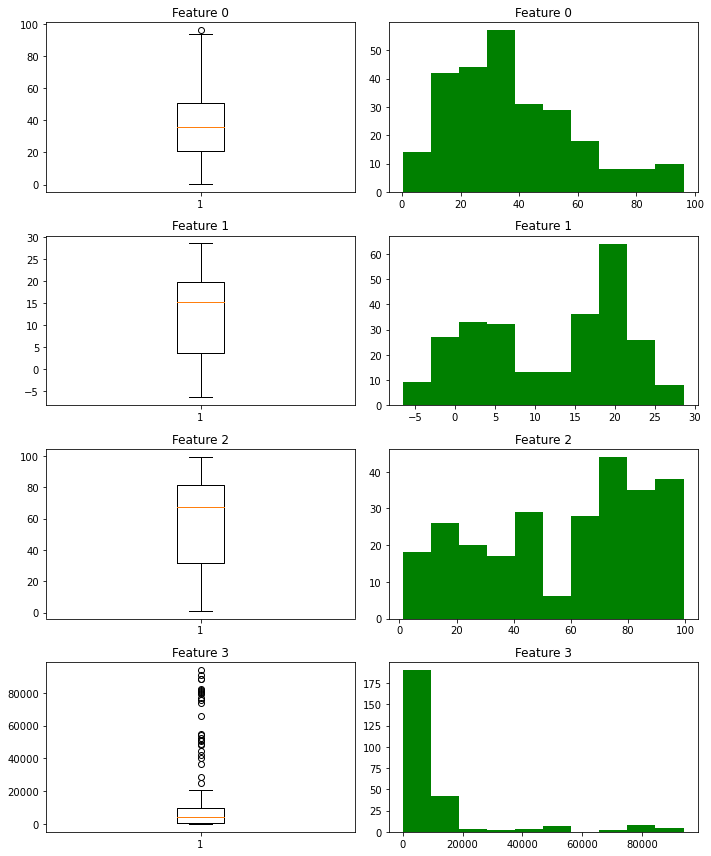

In [52]:
plt.figure(figsize=(10, 12))
plt.tight_layout()
ind = 1
for feat in range(data.shape[1]):
    plt.subplot(4, 2, ind)
    ind += 1
    plt.tight_layout()
    plt.boxplot(data.iloc[:,feat])
    plt.title('Feature ' + str(feat))
    plt.subplot(4, 2, ind)
    ind += 1
    plt.tight_layout()
    plt.hist(data.iloc[:,feat], color='g')
    plt.title('Feature ' + str(feat))
plt.show()

## Feature 0: 
Имеется тяжелый хвост справа, в целом распределение похоже на нормальное со средним около 35
## Feature 1:
Выглядит как бимодальное распределение. Правый пик сильно выше левого, в остальном распределение симметрично относительно 10
## Feature 2:
Похоже на равномерное распределение на отрезке [0, 100]
## Feature 3:
Центр распределения сильно смещён влево. Тяжелый хвост справа.

### Проверка линейной/квадратичной зависимости величин с помощью коэффициента корреляции 

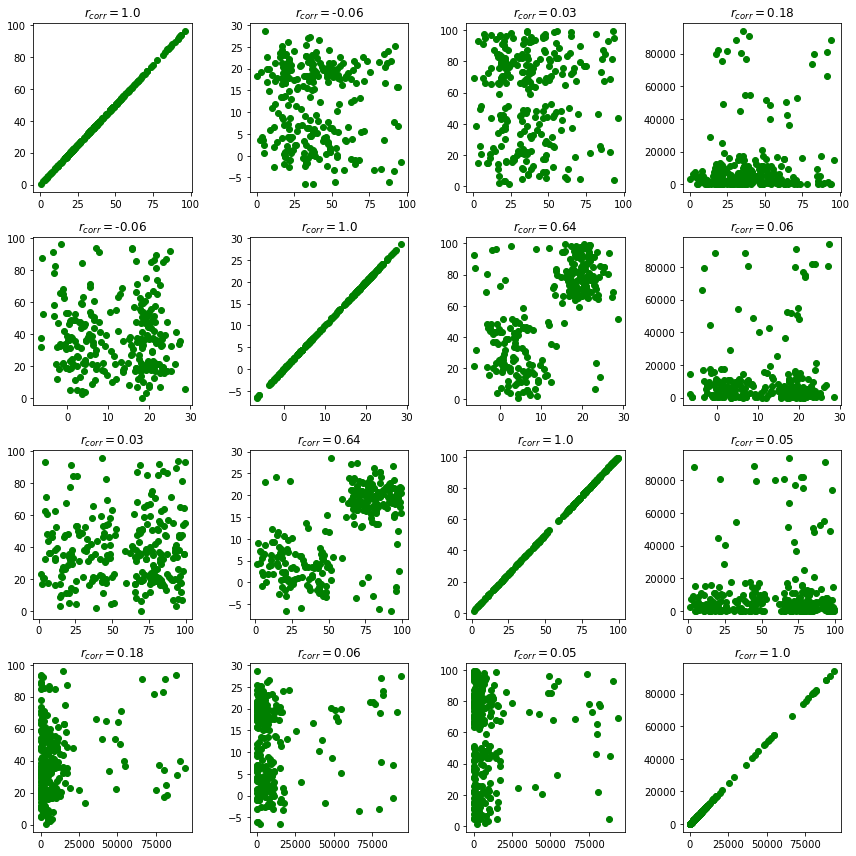

In [61]:
ind = 1
plt.figure(figsize=(12, 12))
plt.tight_layout()
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        plt.subplot(4, 4, ind)
        plt.tight_layout()
        ind += 1
        plt.scatter(data.iloc[:, i], data.iloc[:,j], color='g')
        plt.title('$r_{corr} = $' + str(round(scipy.stats.pearsonr(data.iloc[:,i], data.iloc[:,j])[0], 2)))
plt.show()

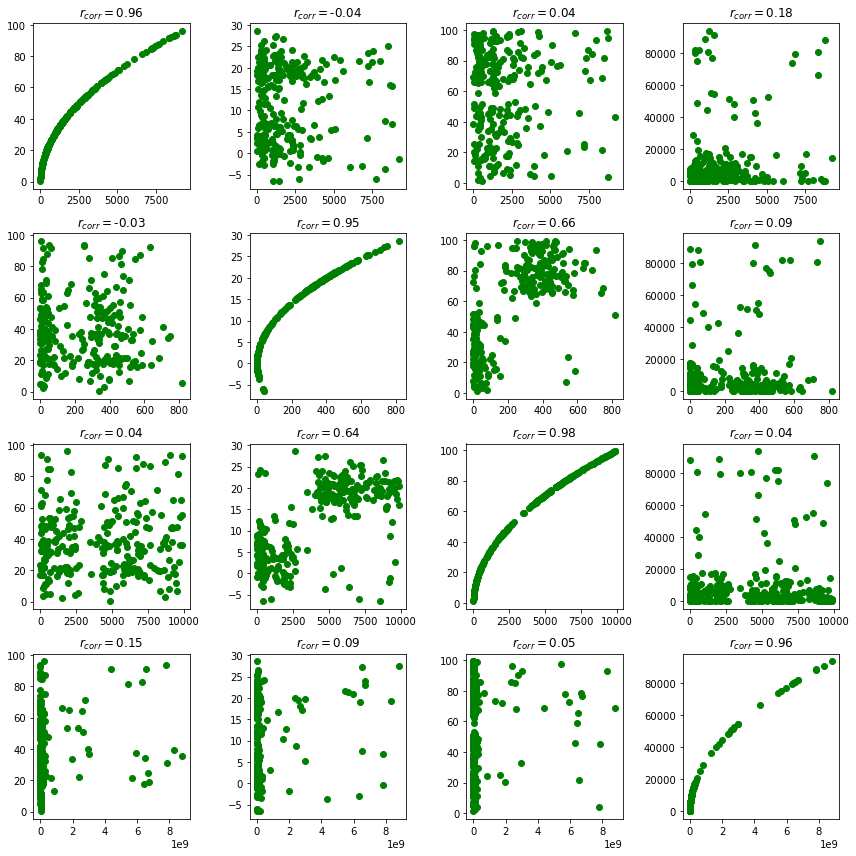

In [62]:
ind = 1
plt.figure(figsize=(12, 12))
plt.tight_layout()
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        plt.subplot(4, 4, ind)
        plt.tight_layout()
        ind += 1
        plt.scatter(np.square(data.iloc[:, i]), data.iloc[:,j], color='g')
        plt.title('$r_{corr} = $' + str(round(scipy.stats.pearsonr(np.square(data.iloc[:,i]), data.iloc[:,j])[0], 2)))
plt.show()

Зависимость, близкая к линейной, наблюдается для 1 и 2 признаков с коэффициентом корреляции 0.64